<a href="https://colab.research.google.com/github/DataParadox/iTrustBD/blob/main/Codes/iTrustBD_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/PG/CSE6413 Network Science/Project Works'

/content/drive/My Drive/PG/CSE6413 Network Science/Project Works


# Dataset

In [ ]:
import pandas as pd
nodeTable_0 = pd.read_csv('./Datasets/Epoch_Out/node_table_0.csv')

In [ ]:
mean = nodeTable_0['Degree'].mean()
std = nodeTable_0['Degree'].std()
beta = 0.5
meu = 0.25
print(mean, std)

12.786677240285488 34.44562407029362


# Analysis

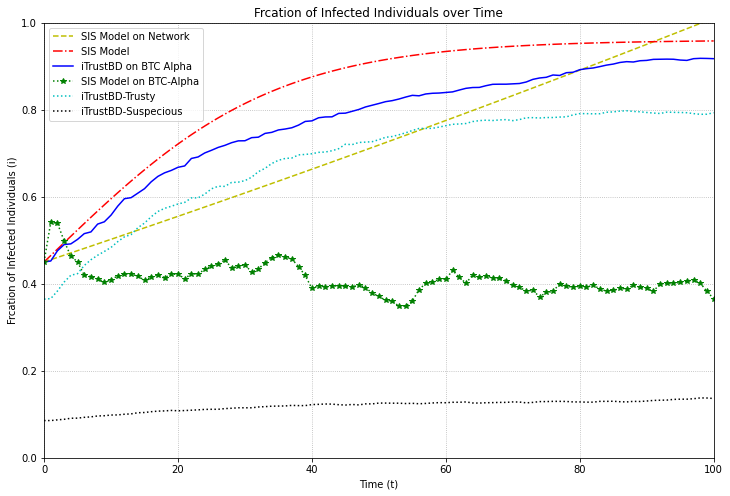

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

 
t = np.linspace(0, 0.15, 101)
 
fig = plt.figure(figsize = (12, 8))

def InfectedIndividuals(t,mean,std,beta,meu):
  from mpmath import mp
  tau_SIS = mean/(beta*std - meu*mean)
  i0 = (sum(nodeTable_0['behavior'].value_counts()) - nodeTable_0['behavior'].value_counts()[0])/sum(nodeTable_0['behavior'].value_counts())
  return i0 * (1 + (((pow(mean, 2)-mean)/(std-mean))*(mp.exp(t/tau_SIS)-1)))
  #return i0 * (1 + (((5*(mean-1))/(std-mean))*(mp.exp(t/tau_SIS)-1)))

InfectedIndividuals = np.vectorize(InfectedIndividuals, excluded=['mean','std','beta','meu'])

i_sis_net = InfectedIndividuals(t, mean, std, beta, meu)

plt.plot(t*100/0.15, i_sis_net, 'y--', label ='SIS Model on Network')

t = np.linspace(0, 1, 101)
 

def InfectedIndividualsSIS(t,mean,std,beta,meu):
  from mpmath import mp
  i0 = (sum(nodeTable_0['behavior'].value_counts()) - nodeTable_0['behavior'].value_counts()[0])/sum(nodeTable_0['behavior'].value_counts())
  C = i0/(1-i0-meu/(beta*mean))
  return (1-meu/(beta*mean))*(C*mp.exp((beta*mean-meu)*t)/(1+C*mp.exp((beta*mean-meu)*t)))

InfectedIndividualsSIS = np.vectorize(InfectedIndividualsSIS, excluded=['mean','std','beta','meu'])

i_sis = InfectedIndividualsSIS(t, mean, std, beta, meu)

plt.plot(t*100, i_sis, 'r-.', label ='SIS Model')

time = np.linspace(0, 100, 101)

def ourInfectedIndividuals(time):
  import pandas as pd
  nodeTable = pd.read_csv('./Datasets/Epoch_Out/node_table_our_{}.csv'.format(int(time)))
  return (sum(nodeTable['behavior'].value_counts()) - nodeTable['behavior'].value_counts()[0])/sum(nodeTable_0['behavior'].value_counts())

ourInfectedIndividuals = np.vectorize(ourInfectedIndividuals)

i_our = ourInfectedIndividuals(time)

plt.plot(time, i_our, 'b', label ='iTrustBD on BTC Alpha')

time = np.linspace(0, 100, 101)

def ourSISInfectedIndividuals(time):
  import pandas as pd
  nodeTable = pd.read_csv('./Datasets/Epoch_Out/node_table_SIS_{}.csv'.format(int(time)))
  return (sum(nodeTable['behavior'].value_counts()) - nodeTable['behavior'].value_counts()[0])/sum(nodeTable_0['behavior'].value_counts())

ourSISInfectedIndividuals = np.vectorize(ourSISInfectedIndividuals)

i_our_SIS = ourSISInfectedIndividuals(time)

plt.plot(time, i_our_SIS, 'g:*', label ='SIS Model on BTC-Alpha')

def ourTrustyInfectedIndividuals(time):
  import pandas as pd
  nodeTable = pd.read_csv('./Datasets/Epoch_Out/node_table_{}.csv'.format(int(time)))
  return nodeTable['behavior'].value_counts()[1]/sum(nodeTable_0['behavior'].value_counts())

ourTrustyInfectedIndividuals = np.vectorize(ourTrustyInfectedIndividuals)

i_trusty = ourTrustyInfectedIndividuals(time)

plt.plot(time, i_trusty, 'c:', label ='iTrustBD-Trusty')

def ourSusInfectedIndividuals(time):
  import pandas as pd
  nodeTable = pd.read_csv('./Datasets/Epoch_Out/node_table_{}.csv'.format(int(time)))
  return nodeTable['behavior'].value_counts()[-1]/sum(nodeTable_0['behavior'].value_counts())

ourSusInfectedIndividuals = np.vectorize(ourSusInfectedIndividuals)

i_suspecious = ourSusInfectedIndividuals(time)

plt.plot(time, i_suspecious, 'k:', label ='iTrustBD-Suspecious')
 
 
# Add features to our figure
plt.legend()
plt.grid(True, linestyle =':')
plt.xlim([0, 100])
plt.ylim([0, 1])
 
plt.title('Frcation of Infected Individuals over Time')
plt.ylabel('Frcation of Infected Individuals (i)')
plt.xlabel('Time (t)')
 
# Save and Show plot
plt.savefig('model_output_analysis.png', transparent=True)
plt.show()